# E-Commerce: Product Range Analysis

[Presentation and Tableau Dashboards](https://drive.google.com/file/d/1f7zecwfwOGQvhkTLmrbT2VHSdvD5YUDl/view?usp=sharing)

#### Description
Analyze the store's product range.

- Carry out exploratory data analysis
- Analyze the product range
- Formulate and test statistical hypotheses

#### Description of the data:

The dataset contains the transaction history of an online store that sells household goods.

The file `ecommerce_dataset_us.csv` contains the following columns:

`InvoiceNo` — order identifier

`StockCode` — item identifier

`Description` — item name

`Quantity`

`InvoiceDate` — order date

`UnitPrice` — price per item

`CustomerID`

## Table of Contents <a class="anchor" id="table_of_contents"></a>

### [Step 1. Downloading the data and preparing it for analysis](#chapter1)
1. Data investigation
    * Concluisons
2. Data preparation
- Store the data in variables. Optimize the data for analysis. 
- Make sure each column contains the correct data type. 
- Check missing values, duplicates, erroneous or faulty data, negative values, comments if there are any, and choose a way for working with them (get rid of duplicates, fill in missing values or neglecting them, explain the decisions made during the data preparation process).
- Check if there are cancelled orders and reset index for them;
- Check data distribution through time, define if there is missing data per certain dates, provide initial insights about seasonality in sales.
    * Concluisons
    
### [Step 2. Make reports and calculate metrics:](#chapter2)
1. Product range. 
    - Investigate the ways to categorize the goods being sold (optional);
        - Plot histograms for sales per category;
        - Investigate top selling products for each category. 
    - Define the goods more often being sold together (combined with others), bundles of product groups are often present in shopping carts;
    - Define the products more often being sold by themselves;
    - What product groups are more often included in the additional assortment?
    * Concluisons
2. Customers
    - Define who are most of our customers? Individuals or wholesalers?
    - RFM segmentation and distribution, recommendations;
    - Provide the list of Top Buying Customers:
        - Give a list of customers bringing the highest revenue;
        - Plot a chart of most often buying customers;
        - Plot a chart of customers buying as wholesalers (lots of same products);
        - Plot a chart of sales per category for Top Buying Customers (if possible).
    * Concluisons
3. Sales
    - Check for outliers in quantity and unit price per customer's purchases;
    - Provide the distribution of number of orders per customer over the year;
    - Provide the Top of Products being sold (total revenue for them), investigate seasonality since we have the data for the whole year, and determine bestsellers for holidays or summer;
    - Define which quarter of the year brings the highest revenue;
    * Concluisons

### [Step 3. Dashboards](#chapter3)
1. Number of Sales and Customers per Day (Tableau)
    1. Plot an interactive diagram showing the number of purchases per day
    2. Add an indicator for the number of customers
    3. Add a purchase date filter
2. Sales Forecast per Category (Tableau)

### [Step 4. Final Conclusions and Recommendations](#chapter4)
Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention, stocking and product range.

### [Step 5. Presentation](#chapter5)

### [Step 6. Sources Used](#chapter6)  



## Table of Contents <a class="anchor" id="table_of_contents"></a>

### [Step 1. Downloading the data and preparing it for analysis](#chapter1)

In [1]:
pip install fasttext


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install squarify


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### 1. Data investigation

In [4]:
# let's import pandas and other necessary libraries and the source dataset:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import plotly.offline as py
py.init_notebook_mode(connected=True)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from IPython.display import display
from sklearn.cluster import KMeans
from dateutil.relativedelta import relativedelta
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import fasttext
import re
import nltk; from nltk.stem import WordNetLemmatizer;from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger'); nltk.download('punkt')
nltk.download('wordnet'); nltk.download('stopwords')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/noa/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/noa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/noa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/noa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# importing dataset
dataset = r"/datasets/ecommerce_dataset_us.csv"
#dataset = r"/Users/noa/ecommerce_dataset_us.csv"
data = pd.read_csv(dataset, sep='\t')

In [6]:
#investigating the 'data' dataset:
print(data.info())
print(data.shape)
print(data.head())
print(data.tail())
print(data.sample())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB
None
(541909, 7)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.     

In [7]:
#let's check if the dataset contains the duplicates:
data.duplicated().sum()

5268

In [8]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [9]:
data[data.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,11/29/2018 11:45,1.25,17908.0
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,11/29/2018 11:45,2.10,17908.0
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,11/29/2018 11:45,2.95,17908.0
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,11/29/2018 11:45,4.95,17908.0
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,11/29/2018 11:49,2.95,17920.0
...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/07/2019 11:34,0.39,14446.0
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/07/2019 11:34,2.49,14446.0
541692,581538,22992,REVOLVER WOODEN RULER,1,12/07/2019 11:34,1.95,14446.0
541699,581538,22694,WICKER STAR,1,12/07/2019 11:34,2.10,14446.0


In [10]:
#checking the missing values by columns:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
dtype: int64

#### Conclusions



### Conclusions <a class="anchor" id="chapter2"></a>
Investigating the 'data' dataset:
- The dataset consists of 541909 rows and 7 columns. Data types: float64(2), int64(1), object(4). 
- Column names are self-descriptive and I'll just change them to lowercase and add '_' to separate the words.
- Duplicates found: 5628.
- Outliers (negative values) found in 'Quantity' and 'UnitPrice' columns.
- Missing values found in 'Description' and 'CustomerID' columns.
- Change data type in 'InvoiceDate' column to datetime.

### 2. Data preparation

In [11]:
#making the column names lowercase for convenience
data.columns = map(str.lower, data.columns)

In [12]:
# changing column names to more readable
data = data.rename(columns={"invoiceno": "invoice_no", "stockcode": "stock_code", 
                            "invoicedate": "invoice_date", "unitprice": "unit_price", 
                            "customerid": "customer_id"})

In [13]:
# changing the data type to 'datetime' where necessary
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

In [14]:
# checking the amount of duplicates in percent
data.duplicated().sum() /len(data)*100


0.9721189350979592

`The amount of duplicated rows is around 1% and we'd drop them.

In [15]:
# dropping the duplicates
data = data.drop_duplicates().reset_index(drop=True)

In [16]:
# checking the missing values
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quantity,536641.0,9.620029,219.130156,-80995.00,1.00,3.00,10.00,80995.0
unit_price,536641.0,4.632656,97.233118,-11062.06,1.25,2.08,4.13,38970.0
customer_id,401604.0,15281.160818,1714.006089,12346.00,13939.00,15145.00,16784.00,18287.0


For now I suppose that the rows with negative quantity are the same as for cancelled orders (starting with 'C' letter). Let's check this hypothesis.

In [17]:
canceled_orders = data.query("quantity <0")
display(canceled_orders)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527.0
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311.0
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548.0
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548.0
...,...,...,...,...,...,...,...
535188,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397.0
536280,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498.0
536447,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311.0
536448,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315.0


In [18]:
# checking the rows starting with 'C' letter in invoice_no column
canceled_orders['invoice_no'].apply(lambda x: x[0]).value_counts()

C    9251
5    1336
Name: invoice_no, dtype: int64

In [19]:
# let's drop the missing values
data = data.dropna().reset_index(drop=True)
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850.0


In [20]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
unit_price,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
customer_id,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


We still should filter more data, as the cancelled orders are same as normal, but containing negative values in 'quantity' column.

In [21]:
# defining non-negative values
not_negative = data[data['quantity']>0].reset_index()
canceled_orders = canceled_orders.reset_index()
# taking absolute value for quantity
canceled_orders['quantity'] = abs(canceled_orders['quantity'])
comapred_columns = ['customer_id','unit_price','quantity','description']

In [22]:
comparasion = pd.merge(not_negative, canceled_orders, on = comapred_columns).sort_values("customer_id")
display(comparasion)

,index_x,invoice_no_x,stock_code_x,description,quantity,invoice_date_x,unit_price,customer_id,index_y,invoice_no_y,stock_code_y,invoice_date_y
1027,37511,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2019-01-16 10:01:00,1.04,12346.0,61011,C541433,23166,2019-01-16 10:17:00
1933,86626,547390,21914,BLUE HARMONICA IN BOX,12,2019-03-20 16:08:00,1.25,12352.0,128587,C547388,21914,2019-03-20 16:07:00
1624,86620,547390,84050,PINK HEART SHAPE EGG FRYING PAN,12,2019-03-20 16:08:00,1.65,12352.0,128581,C547388,84050,2019-03-20 16:07:00
1623,81800,546869,84050,PINK HEART SHAPE EGG FRYING PAN,12,2019-03-15 16:00:00,1.65,12352.0,128581,C547388,84050,2019-03-20 16:07:00
1627,69127,545332,M,Manual,1,2019-02-27 15:52:00,183.75,12352.0,105418,C545329,M,2019-02-27 15:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...
5154,337281,575485,22851,SET 20 NAPKINS FAIRY CAKES DESIGN,12,2019-11-07 17:03:00,0.85,18274.0,484012,C577832,22851,2019-11-20 10:18:00
5159,337286,575485,21231,SWEETHEART CERAMIC TRINKET BOX,12,2019-11-07 17:03:00,1.25,18274.0,484016,C577832,21231,2019-11-20 10:18:00
5160,337287,575485,21974,SET OF 36 PAISLEY FLOWER DOILIES,12,2019-11-07 17:03:00,1.45,18274.0,484015,C577832,21974,2019-11-20 10:18:00
5156,337283,575485,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,4,2019-11-07 17:03:00,4.95,18274.0,484010,C577832,23243,2019-11-20 10:18:00


Seems like we were right and it's possible to drop these rows to get rid of the cancelled orders. But just to be sure let's check the logical order of operations. We suppose that the cancelled orders rows are happening after the time of the first invoices given. That means that for the same customer id the negative quantities don't happen before the positive ones.

In [23]:
comparasion = comparasion[comparasion['invoice_date_x'] < comparasion['invoice_date_y']]
#dropping the cancelled rows matching thelogical invoice dates order
rows_to_drop = set(np.append(comparasion['index_x'].values, comparasion['index_y'].values))
print(len(rows_to_drop)/len(data)*100)
data = data.query("index not in @rows_to_drop")

1.6209997908387366


Around 1.6% of data has been dropped.

In [24]:
# let's check the amount of negative data still remaining in the dataset
len(data.query("quantity < 0"))/len(canceled_orders)

0.8332861056012091

Around 68% of negative rows still remaining. I suppose that these might be the cancelled orders for the orders made before the dataset's time frame. These rows might be a reson of mistakes in further calculations and due to theis small volume I'd drop them.

In [25]:
# dropping the negative quantity rows
data = data.query("quantity > 0").reset_index(drop=True)

In [26]:
# dropping the negative price rows
data = data.query("unit_price > 0").reset_index(drop=True)

In [27]:
# final check for the duplicated rows
print(data.duplicated().sum())

0


<AxesSubplot:>

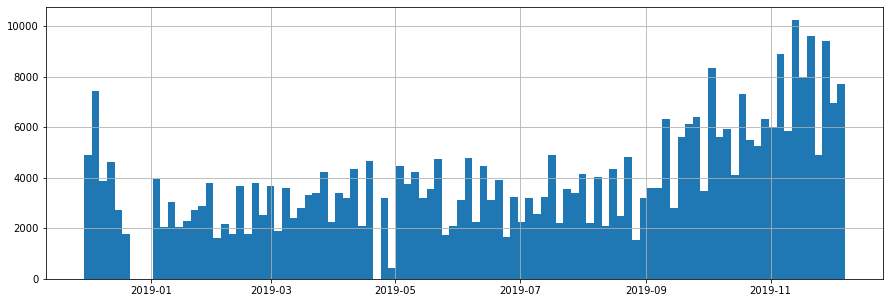

In [28]:
# checking data distribution through time
data['invoice_date'].hist(figsize=(15,5),bins=100)

In [29]:
print(data['invoice_date'].agg([min, max]))

min   2018-11-29 08:26:00
max   2019-12-07 12:50:00
Name: invoice_date, dtype: datetime64[ns]


Two big gaps found in the dataset in November, 2018 and January, 2019. In order to deal with it and clear the dataset I'd substract the data gathered before January, 2019 from the dataset.

In [30]:
# filtering the data gathered before January, 2019
data = data[data['invoice_date'].dt.strftime('%Y-%m-%d') > '2018-12-31']

<AxesSubplot:>

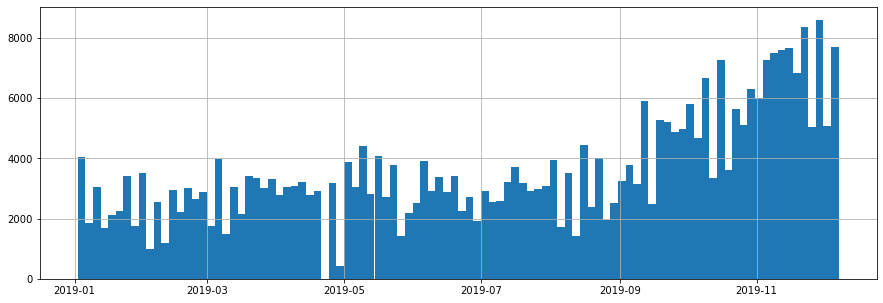

In [31]:
data['invoice_date'].hist(figsize=(15,5),bins=100)

In [32]:
print(data['invoice_date'].agg([min, max]))

min   2019-01-02 10:00:00
max   2019-12-07 12:50:00
Name: invoice_date, dtype: datetime64[ns]


#### Conclusions
Investigating the 'data' dataset:
- Column names changed them to lowercase and added '_' to separate the words.
- Duplicates explored explored and filtered.
- Outliers (negative values) explored and filtered.
- Missing values explored and filtered.
- Changed data type in 'InvoiceDate' column to datetime.
- Checked the data distribution through time and cleaned.

[Go back to the Table of Contents](#table_of_contents)

### [Step 2. Make reports and calculate metrics:](#chapter2)

In [33]:
#creating the necessary variables for further investigation 
data['month'] = data['invoice_date'].dt.month
data['day'] = data['invoice_date'].dt.date
data['year'] = data['invoice_date'].dt.year
data['hour'] = data['invoice_date'].dt.hour
data['total_price']  = data['quantity'] * data['unit_price']

In [34]:
# exploring unique raws and getting the general overview of the dataset
data[['invoice_no', 'stock_code','customer_id']].apply(lambda x: x.nunique())

invoice_no     16957
stock_code      3582
customer_id     4206
dtype: int64

So in general we have 16962 orders, 3582 unique items sold and 4207 unique customers.
Now lets plot the diagrams to explore the general customers behaviour.

In [35]:
data['unit_price'].describe()

count    361482.000000
mean          3.064878
std          22.004016
min           0.001000
25%           1.250000
50%           1.790000
75%           3.750000
max        8142.750000
Name: unit_price, dtype: float64

Most of the items are relatively cheap and cost around 1.79$.

In [36]:
# defining a function for chart modifications
def modifyChart(ax,title,labelSize,xLabel='',yLabel='',
                titleSize=False,maxs=False,grid=False,
                highlightTop =False,highlightXVal =False, topValueColor=False):
    """
    Function that takes in graph variables for the purpose of customizing 
    their default settings (ie. setting label size)
    """
    if titleSize != False:
        ax.set_title(title,fontsize=titleSize,fontweight='semibold', pad=10)
    else:
        ax.set_title(title)

    # defining the spines
    sns.despine()
    ax.spines['bottom'].set_color('gray')
    ax.spines['left'].set_color('lightgrey')

    # defining the labels
    ax.set_ylabel(yLabel, labelpad=5, fontsize=16)
    ax.set_xlabel(xLabel, labelpad=5, fontsize=16)

    # tick settings
    ax.tick_params(labelsize=labelSize)
    ax.tick_params(axis='both', left=False, bottom=False)

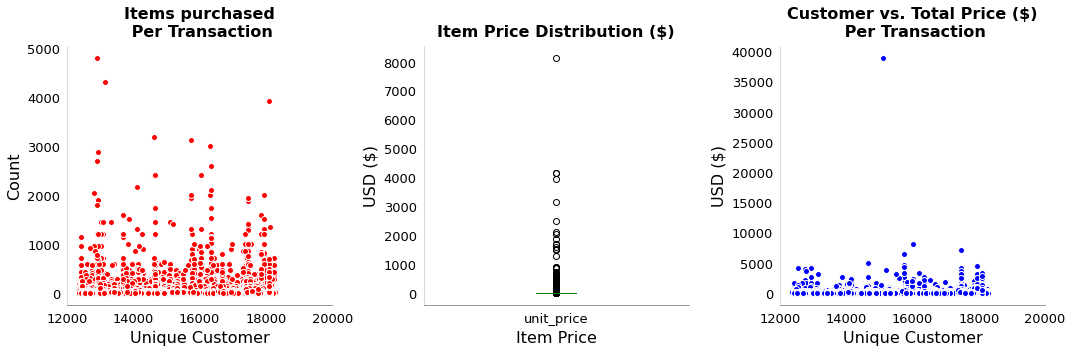

In [37]:
# plotting a diagram to explore number of items purchased per transaction per unique customer
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15, 7))
sns.scatterplot(x=data['customer_id'],
                y=data['quantity'], ax=ax[0], color='red', linewidth=1)
modifyChart(ax[0], "Items purchased\n Per Transaction", 13,
                 xLabel='Unique Customer', yLabel='Count', grid='y', titleSize=16)
ax[0].set_xticks(ax[0].get_xticks())

# plotting a diagram to explore prices per unique items
data['unit_price'].plot.box(ax=ax[1], figsize=(15, 5), color='green')
modifyChart(ax[1], "Item Price Distribution ($)",13,
                xLabel='Item Price', yLabel='USD ($)', grid='y', titleSize=16)
ax[1].set_xticks(ax[1].get_xticks())

# plotting a diagram to explore money sum spent by customer per transaction
sns.scatterplot(x=data['customer_id'],
                y=data['total_price'], ax=ax[2], color='blue', linewidth=1)
modifyChart(ax[2], "Customer vs. Total Price ($)\n Per Transaction", 13,
                 xLabel='Unique Customer', yLabel='USD ($)',grid='y', titleSize=16)
ax[2].set_xticks(ax[2].get_xticks())
plt.tight_layout()

From the graphs we see that most of the customers buy less than 1000 items, but we have also wholestockers; price per unit is mostly less than 1000 dollars, so the items being sold are relatively cheap; most of the customers spend less than 1000$ per transaction. 

/Users/noa/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

<ipython-input-38-64aaa5659536>:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



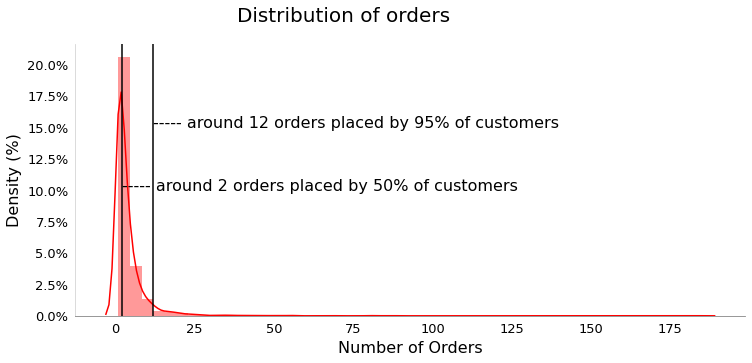

In [38]:
# exploring the number of orders made during the timeframe of the dataset (around 1 year)
orders = data.groupby('customer_id').agg({"invoice_no": 'nunique'})
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(orders, ax=ax, color='red')
ax.set_yticklabels([f'{i*100:.1f}%' for i in ax.get_yticks()])
modifyChart(ax, '', 13, grid='y',
                 xLabel='Number of Orders', yLabel='Density (%)', titleSize=14)

quantile50, quantile95 = orders['invoice_no'].quantile(
    .50), orders['invoice_no'].quantile(.95)
plt.axvline(quantile50, linestyle='-', color='black')
plt.text(quantile50, ax.get_yticks()[
         4], f'----- around {int(quantile50)} orders placed by 50% of customers', fontsize=16)
plt.axvline(quantile95, linestyle='-', color='black')
plt.text(quantile95, ax.get_yticks()[
         6], f'----- around {int(quantile95)} orders placed by 95% of customers', fontsize=16)
plt.title("Distribution of orders",
          x=.4, y=1.06, fontsize=20)
plt.show()

Half of the customers placed around 2 orders, 95% of the customers placed around 12 orders or less. So our clients are buying relatively often.

In [39]:
# let's explore the maximum value per 1 item, maximum quantity per unique item and maximum price payed:
display(data.iloc[np.where(data['unit_price'] == data['unit_price'].max())],
        data.iloc[np.where(
            data['quantity'] == data['quantity'].max())],
        data.iloc[np.where(data['total_price'] == data['total_price'].max())])

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,month,day,year,hour,total_price
115025,551697,POST,POSTAGE,1,2019-05-01 13:46:00,8142.75,16029.0,5,2019-05-01,2019,13,8142.75


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,month,day,year,hour,total_price
299680,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2019-10-25 12:26:00,0.21,12901.0,10,2019-10-25,2019,12,1008.0


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,month,day,year,hour,total_price
151011,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,2019-06-08 15:28:00,649.5,15098.0,6,2019-06-08,2019,15,38970.0


'Postage' seems to be a unique item according to it's price.
'WORLD WAR 2 GLIDERS ASSTD DESIGNS' item has been bought in quantity of 4800 on October, 25, before Veterans Day in USA (November, 11).
60 'PICNIC BASKET WICKER 60 PIECES' were sold before Indepence Day (4th of July), when people in USA are usually celebrating outdoors.
So we can see that the maximum value is brought by wholestockers.

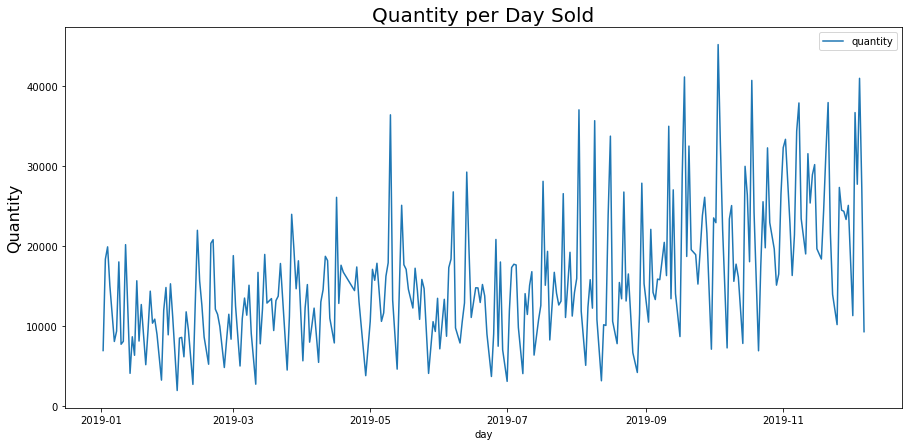

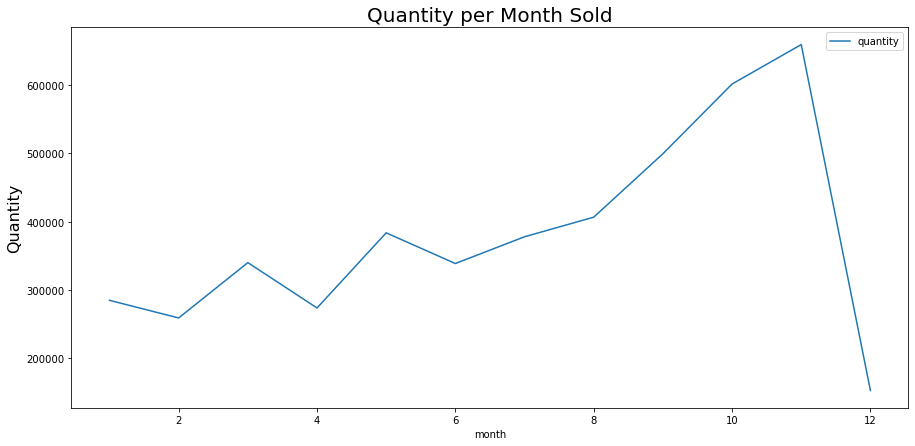

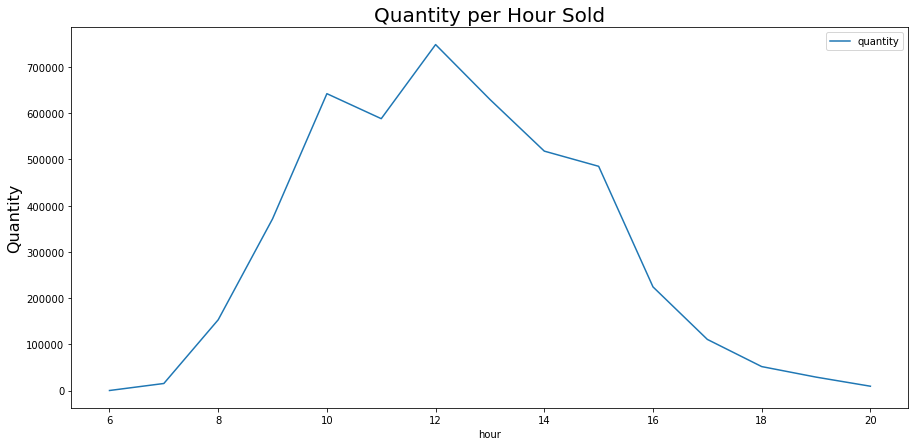

In [40]:
# Let's explore sales per time distribution

# plotting quantity sold distribution per day:
quantity_per_day = data.groupby(['day']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Day Sold', fontsize=20)
# setting axis label
plt.ylabel("Quantity", fontsize=16)
quantity_per_day.plot(ax=ax)

# plotting quantity sold distribution per day:
quantity_per_month = data.groupby(['month']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Month Sold', fontsize=20)
# setting axis label
plt.ylabel("Quantity", fontsize=16)
quantity_per_month.plot(ax=ax)

# plotting quantity sold distribution per hour:
quantity_per_hour = data.groupby(['hour']).agg({'quantity': 'sum'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Hour Sold', fontsize=20)
# setting axis label
plt.ylabel("Quantity", fontsize=16)

quantity_per_hour.plot(ax=ax)
plt.show()

Huge amount of the orders were received around the end of a year, probably because the clients were stocking up before Christmas holidays and buying presents.
An interesting thing discovered when investigating Sales per Hour chart: most of the sales have been made in office working hours. We can suppose that individuals buying for personal purpose are usually buying after office hours (in the evening), so it supports our presumption that the biggest sales are brought to the company buy wholestockers, not individuals. Let's investigate it and explore sales per unique customers over time.

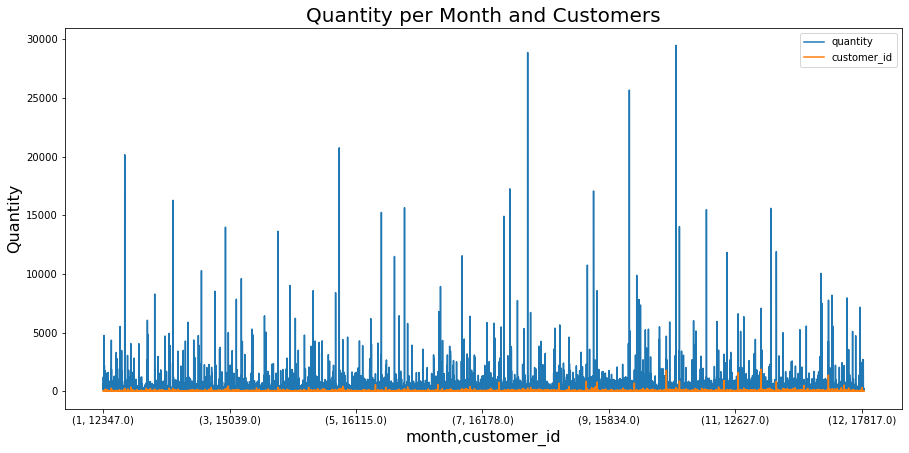

In [41]:
# Let's explore sales per time distribution

# plotting quantity sold distribution per month:
quantity_per_month_customer = data.groupby(['month', 'customer_id']).agg({'quantity': 'sum', 'customer_id': 'count'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Quantity per Month and Customers', fontsize=20)
# setting axis label
plt.ylabel("Quantity", fontsize=16)
plt.xlabel("Month, Customers", fontsize=16)
quantity_per_month_customer.plot(ax=ax)
plt.show()

Much more customers are ordering in the end of the year.

In [42]:
#how much money was spent over time (per each month and year):
revenue_per_month = data.groupby(['month']).agg({'total_price': 'sum'}).round(2)

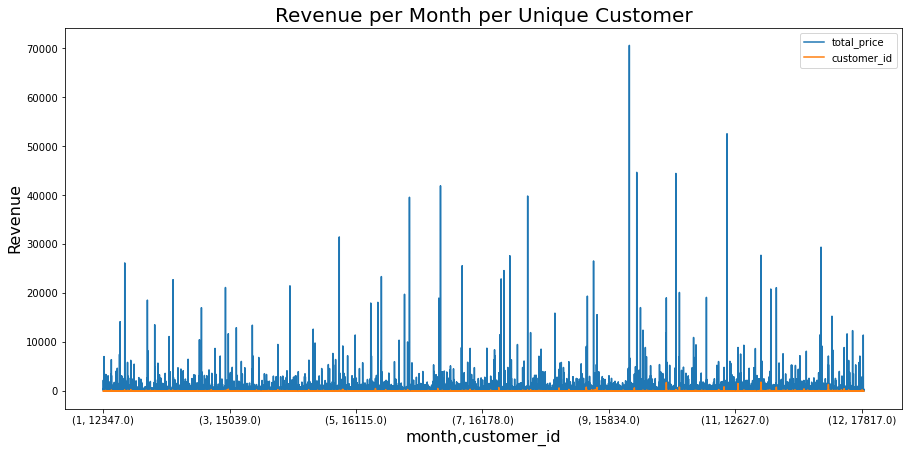

In [43]:
# plotting quantity sold distribution per hour:
quantity_per_day_customer = data.groupby(['month', 'customer_id']).agg({'total_price': 'sum', 'customer_id': 'count'})
fig, ax = plt.subplots(figsize=(15,7))
plt.title('Revenue per Month per Unique Customer', fontsize=20)
# setting axis label
plt.ylabel("Revenue", fontsize=16)
plt.xlabel("Month, Customers", fontsize=16)
quantity_per_day_customer.plot(ax=ax)
plt.show()

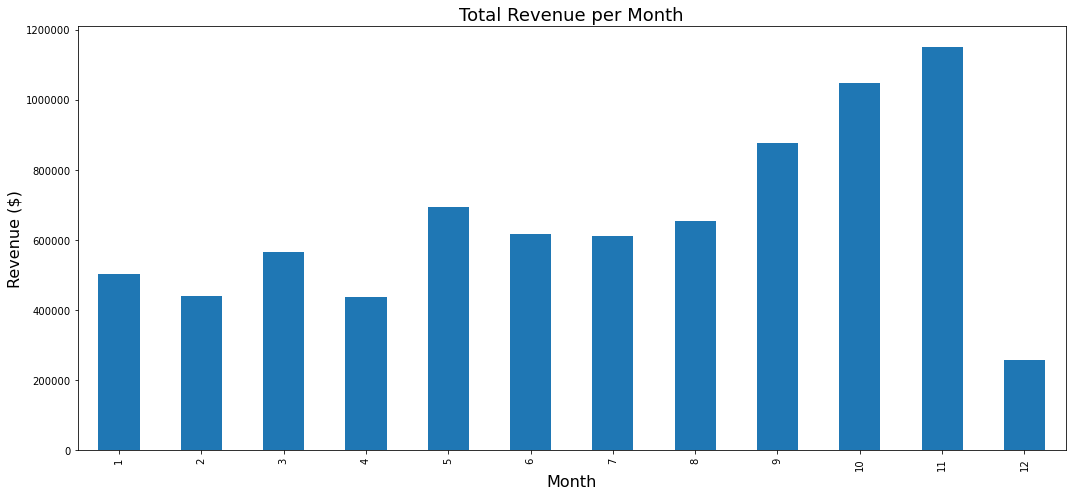

In [44]:
# plotting a histogram for total revenue per month
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('month')['total_price'].sum().plot.bar()
plt.ylabel("Revenue ($)", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.title("Total Revenue per Month", fontsize=18)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

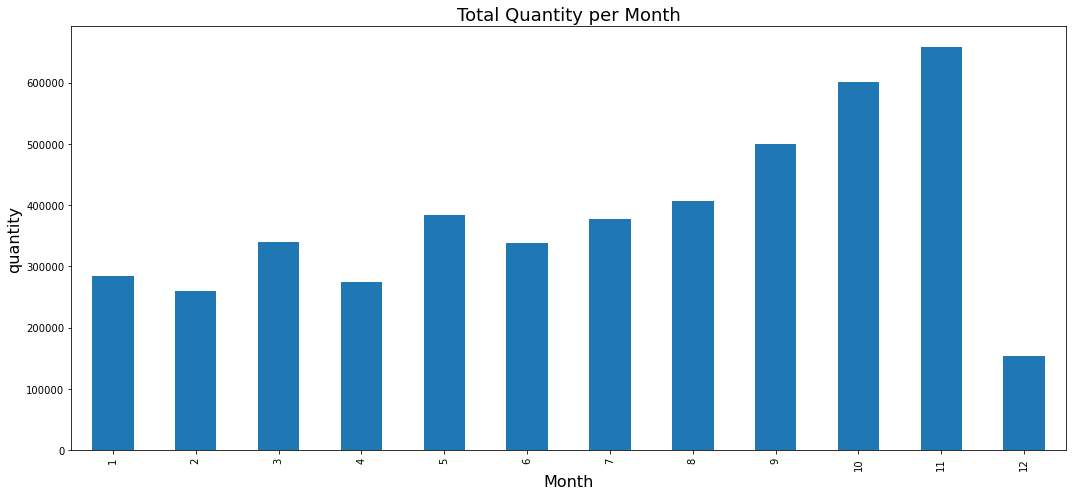

In [45]:
# plotting a histogram for total revenue per month
fig, ax = plt.subplots(figsize=(15,7))
data.groupby('month')['quantity'].sum().plot.bar()
plt.ylabel("quantity", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.title("Total Quantity per Month", fontsize=18)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()
plt.show()

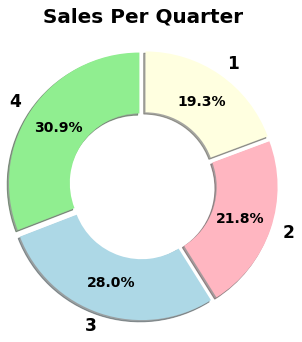

In [46]:
# investigating the sales per quarter (quantity)
data['quarter'] = data['invoice_date'].dt.quarter
groups = (data.groupby("quarter")  # quarter
          .agg({'quantity': 'sum'})  # total items bought
          .reset_index().sort_values('quarter', ascending=False))  # in descending order by quarter
explode = (0.05, 0.05, 0.05, 0.05)

patches, texts, autotexts = plt.pie(
    groups['quantity'].divide(groups['quantity'].sum()),  # relative value
    shadow=True, colors=['lightgreen', 'lightblue', 'lightpink', 'lightyellow'],
    labels=groups['quarter'], autopct='%1.1f%%',
    textprops={'fontsize': 17, 'fontweight': 'bold'}, wedgeprops=dict(width=0.7),
    explode=explode, startangle=90, pctdistance=0.75, radius=1.5)

for text in autotexts:
    text.set_fontsize(14)
    text.set_color('black')
plt.title("Sales Per Quarter", pad=55, size=20, x=.5,
          fontweight='bold', color='black')
plt.show()

As we see from the chart, the highest sales by quantity are falling on 3rd and 4th quarter of the year.

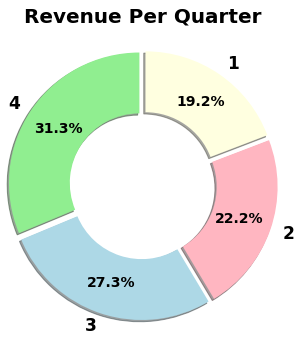

In [47]:
# investigating the revenue per quarter (income)
groups = (data.groupby("quarter")  # quarter
          .agg({'total_price': 'sum'})  # total items bought
          .reset_index().sort_values('quarter', ascending=False))  # in descending order by quarter
explode = (0.05, 0.05, 0.05, 0.05)

patches, texts, autotexts = plt.pie(
    groups['total_price'].divide(groups['total_price'].sum()),  # relative value
    shadow=True, colors=['lightgreen', 'lightblue', 'lightpink', 'lightyellow'],
    labels=groups['quarter'], autopct='%1.1f%%',
    textprops={'fontsize': 17, 'fontweight': 'bold'}, wedgeprops=dict(width=0.7),
    explode=explode, startangle=90, pctdistance=0.75, radius=1.5)

for text in autotexts:
    text.set_fontsize(14)
    text.set_color('black')
plt.title("Revenue Per Quarter", pad=55, size=20, x=.5,
          fontweight='bold', color='black')
plt.show()

Same picture with income (revenue) per quarter - 3rd and 4th are the most successful.

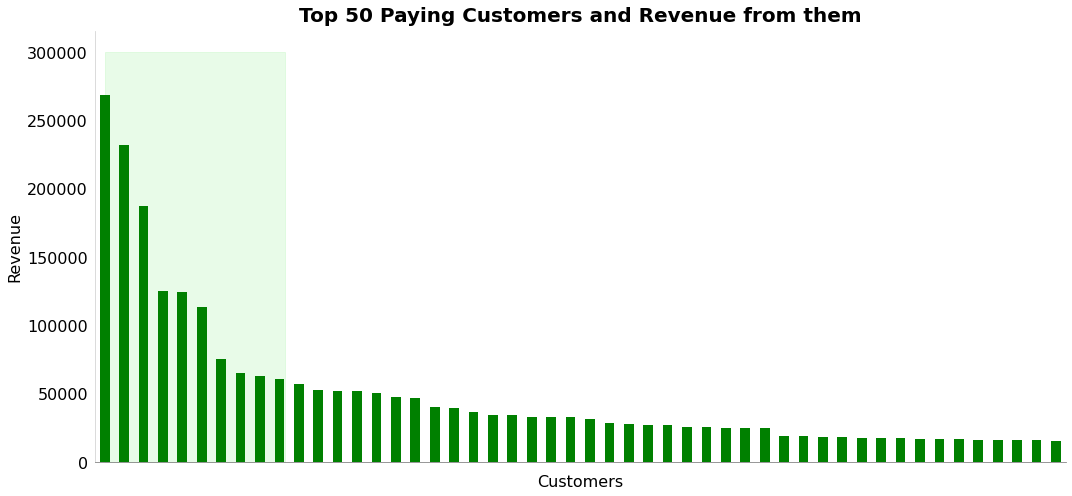

In [48]:
# let's define top 50 paying customers and their share in total revenue
fig, ax = plt.subplots(figsize=(15, 7))
(data.groupby("customer_id")  
 .agg({"total_price": "sum"}) 
 .sort_values("total_price").tail(50)
 # in ascending order by dollars spent
 .sort_values('total_price', ascending=False)
 # bar plot
 .plot.bar(ax=ax, color='green', legend=False)
 )
plt.fill_between((0, 9.3), ax.get_yticks()[-1], 0, color='lightgreen', alpha=0.2)

modifyChart(ax, title = 'Top 50 Paying Customers and Revenue from them', grid='y',
                 titleSize=20, xLabel="Customers", yLabel='Revenue', labelSize = 16)
# setting xtick labels
ax.set_xticklabels([])

plt.tight_layout()

plt.show()

In [49]:
top_10_revenue = f'{sum([i.get_height() for i in ax.patches[:10]]):,.0f}'
rest_top_revenue = f'{sum([i.get_height() for i in ax.patches[10:]]):,.0f}'

print('Revenue from Top 10 Buying Customers:', top_10_revenue)
print('Revenue from Top 11-50 Buying Customers:', rest_top_revenue)
print(f"Total revenue {data.total_price.sum().sum():,.0f} \n",
'Customers:', data['customer_id'].nunique())

Revenue from Top 10 Buying Customers: 1,313,340
Revenue from Top 11-50 Buying Customers: 1,160,720
Total revenue 7,845,949 
 Customers: 4206


From the plot and the numbers gotten we can say that Top 50 out of 4206 buying customers are bringing 50% of total revenue. So there is sense to pay more attention to this customers, especially for marketing team. 

### Conclusions
In general we have 16962 orders, 3582 unique items sold and 4207 unique customers.
Most of the items are relatively cheap and cost around 1.79$.
Revenue from Top 10 Buying Customers: 1,313,340
Revenue from Top 11-50 Buying Customers: 1,160,720
Total revenue 7,845,949 

Most of the customers buy less than 1000 items, but we have also wholestockers; price per unit is mostly less than 1000 dollars, so the items being sold are relatively cheap; most of the customers spend less than 1000$ per transaction. 
Top sold items:
- 'Postage' seems to be a unique item according to it's price.
- 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' item has been bought in quantity of 4800 on October, 25, before Veterans Day in USA (November, 11).
- 60 'PICNIC BASKET WICKER 60 PIECES' were sold before Indepence Day (4th of July), when people in USA are usually celebrating outdoors.
So we can see that the maximum value is brought by wholestockers.

Huge amount of the orders were received arounf the end of the year, probably because the clients were stocking up before Christmas holidays and buying presents.
An interesting thing discovered when investigating Sales per Hour chart: most of the sales have been made in office working hours. We can suppose that individuals buying for personal purpose are usually buying after office hours (in the evening), so it supports our presumption that the biggest sales are brought to the company buy wholestockers, not individuals. 

The highest sales by quantity are falling on 3rd and 4th quarter of the year.

## Categorization

In [50]:
# in order to filter the values in 'description' column let's get rid of special numbers, colors, whitespaces, stopwords and make them lowercase

spec_skip = "!@#$%^&*()[]{};:,./<>?\|`~-=_+"
colors_num_skip = ['[0-9]', 'green', 'orange', 'grey', 'brown', 'purple', 'pink', 'blue', 
             'black', 'red','white']
stop_words = set(stopwords.words('english'))
def preprocess_sentences(words):
    """
    Keep only letters (all lowercased) and whitespaces, tokenize sentences, and then lemmatize each word per sentence
    """
    #initialize the Wordnet Lemmatizer
    wordnet_lemma = WordNetLemmatizer()
    words = words.lower() 
    # remove special characters
    newString = words.translate({ord(c): "" for c in spec_skip}).strip()
    # remove colors
    for pattern in colors_num_skip:
        newString = re.sub(pattern, '', newString).strip()
    # remove stop words
    newString = [word for word in newString.split() if word not in stop_words]
    lemmatizedWords= ' '.join([wordnet_lemma.lemmatize(word) for word in newString]) #lemmatize to root word
    return lemmatizedWords

In [51]:
# preprocessing the item descriptions
data['description'] = data['description'].apply(lambda x: preprocess_sentences(x.lower()))

In [52]:
# checking how the data is displayed after filtering
display(data['description'])

25305                  jumbo bag polkadot
25306                       polkadot wrap
25307                      retrospot wrap
25308             recycling bag retrospot
25309               retrospot shopper bag
                       ...               
386782               pack spaceboy napkin
386783        children's apron dolly girl
386784       childrens cutlery dolly girl
386785    childrens cutlery circus parade
386786         baking set piece retrospot
Name: description, Length: 361482, dtype: object

In [53]:
# saving preprocessed words column to a text file
with open('file.txt', 'a') as f:
    f.write(data['description'].to_csv(
        header=False, index=False, encoding="utf-8"))
    
# training with vectors set to 100 dimensions
ft_model = fasttext.train_unsupervised('file.txt', dim=100)
# get vectors
data['vec'] = data['description'].apply(
                            lambda x: ft_model.get_sentence_vector(x))

# save as X for elbow plot
X = np.asarray(list(data['vec'].values))

In order to define number of clusters we will be using Elbow Method and there are ro methods to do it: distortion and inertia. Let's check both of them.

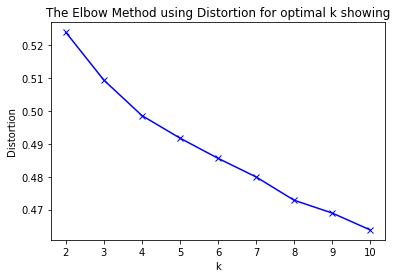

In [54]:
from scipy.spatial.distance import cdist 
distortions = []
mapping1 = {} 

K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
    
# plotting the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion for optimal k showing')
plt.show()

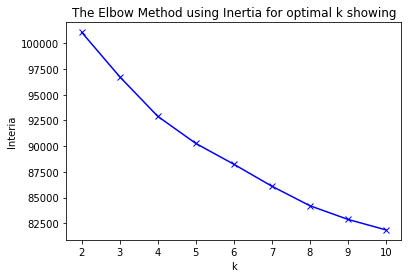

In [55]:
inertias = [] 
mapping2 = {} 

K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_) 
    mapping2[k] = kmeanModel.inertia_ 
    
 
# plotting the elbow
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia for optimal k showing')
plt.show()

Inertia shows a sharper elbow and we'll be using 6 as a k-mean for further investigation.

In [56]:
kmeans = KMeans(6)
data['clusters'] = kmeans.fit_predict(
    X)  # vectorized words from text classifier
data['clusters'] = data['clusters'].apply(
    lambda x: x+1)
[data['clusters'].value_counts(
    normalize=i).sort_values(ascending=False) for i in [True, False]]

[3    0.273704
 5    0.219358
 4    0.197479
 6    0.171314
 2    0.099175
 1    0.038970
 Name: clusters, dtype: float64,
 3    98939
 5    79294
 4    71385
 6    61927
 2    35850
 1    14087
 Name: clusters, dtype: int64]

Roughly 30% of items were placed in the 1st cluster and 22% to the 3rd.

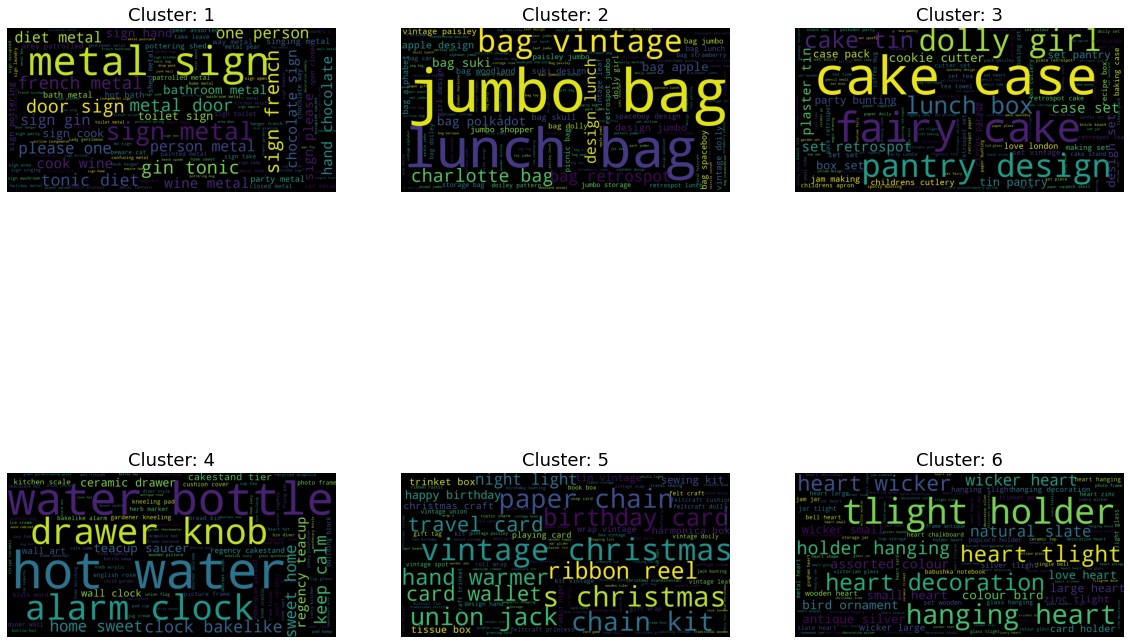

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))
axes = [(row, col) for row in range(2) for col in range(3)]
for clust, i in zip(sorted(list(data['clusters'].unique())), axes):
    cluster = data.query("clusters==@clust")['description'].to_list()
    text = ' '.join(cluster)
    # lowering max_font_size, changing the maximum number of words and lightening the background:
    wordcloud = WordCloud(scale=3).generate(text)
    # displaying the generated image:
    plt.sca(ax[i])
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f'Cluster: {clust}', fontsize=18, y=1.01)
    
ax[axes[-1]].set_axis_off()
ax[axes[-2]].set_axis_off()
plt.show()


Let's define the clusters meanings according to word clouds:
1. Kitchen and cooking items
2. Water bottles and metal stuff
3. Home furniture and clocks
4. Bags
5. Holiday decorations
6. Home design

Let's investigate the sales according to clusters.

In [58]:
cluster_agg = data.groupby(['clusters']).agg(
    {"quantity": "sum", "total_price": "sum"})

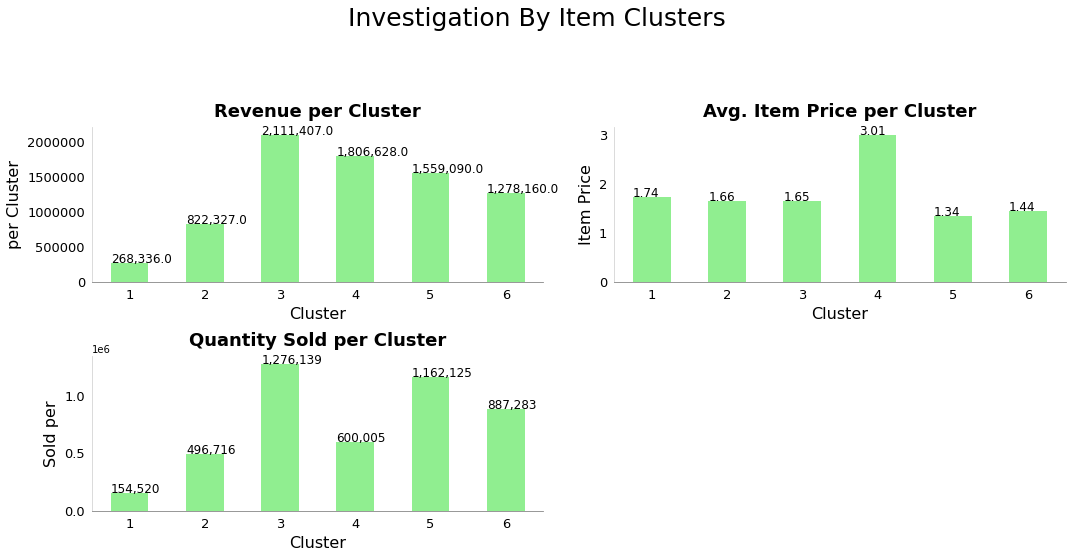

In [59]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(15, 7))
cluster_agg['quantity'].plot.bar(
    ax=ax[1, 0], rot=0, color='lightgreen')  
cluster_agg['total_price'].plot.bar(
    ax=ax[0, 0], rot=0, color='lightgreen') 
(cluster_agg['total_price'] / cluster_agg['quantity']
     ).plot.bar(ax=ax[0, 1], rot=0, legend=False, color='lightgreen')

[ax[1, 0].text(rec.get_x(), rec.get_height(), f'{rec.get_height():,.0f}',
               fontsize=12) for rec in ax[1, 0].patches]
[[ax[i].text(rec.get_x(), rec.get_height(), f'{round(rec.get_height(),precision):,}',
             fontsize=12) for rec in ax[i].patches] for i, precision in zip([(0, 0), (0, 1)], [0, 2])]

[modifyChart(ax[i], text, 13, grid='y',titleSize=18, xLabel='Cluster', yLabel=' '.join(text.split()[1:3]))
    for text, i in zip(['Revenue per Cluster', 'Avg. Item Price per Cluster', 'Quantity Sold per Cluster'], [(0, 0), (0, 1), (1, 0)])]

plt.suptitle('Investigation By Item Clusters', fontsize=25, y=1.10)
ax[(1, 1)].axis('off')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.tight_layout()


As we see from the charts:
- cluster 1 (kitchen and cooking items) is sold in the largest quantities and brought the highest revenue.
- cluster 2 (water bottles and metal) is relatively expencive, brought the lowest revenue and very few of it has been sold. It's better to think if we should continue selling this cluster's items in the future.
- cluster 3 (home furniture and clocks) takes the second place according to revenue, good quantity has been sold and price per item is also relatively high.
- cluster 4 (bags) is not the best when it comes to revenue and quantity sold, but not as bad as the 2nd cluster.
- clusters 5 and 6 are pretty similar and showing the good score both by revenue and items sold quntity.


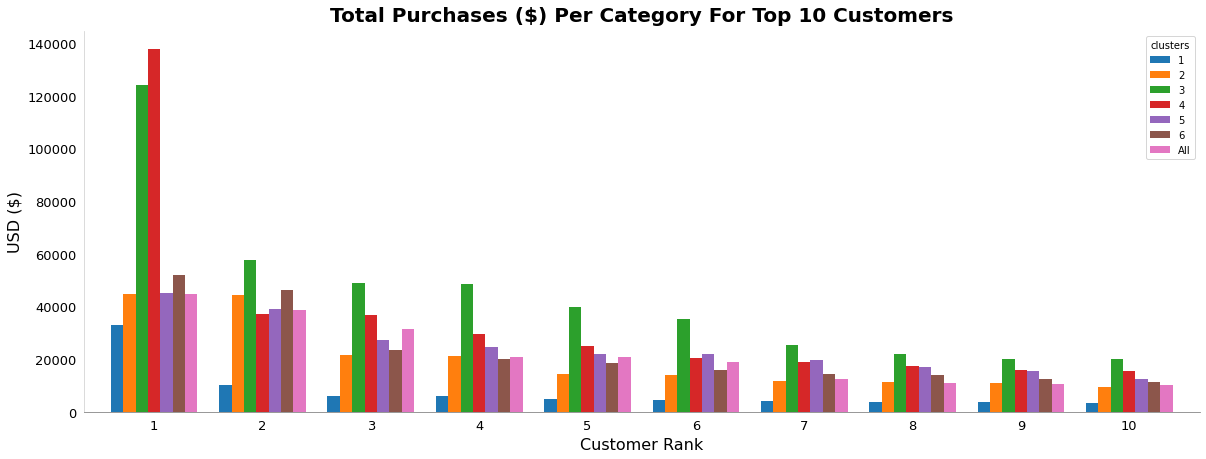

In [60]:
# let's investigate the total revenue per cluster for top 10 clients
category_purchases = data.pivot_table(
    index='customer_id', columns='clusters', values='total_price', aggfunc='sum').fillna(0).assign(All=lambda x: x.mean(1))
fig, ax = plt.subplots(figsize=(20, 7))

chart = (category_purchases.apply(lambda x: x.sort_values().values)  # sorted across all columns
         .tail(10).iloc[::-1]  # sorted in descending order
         .plot.bar(ax=ax, width=.80, rot=0))

modifyChart(ax, 'Total Purchases ($) Per Category For Top 10 Customers', 13, grid='y',
                 xLabel='Customer Rank', yLabel='USD ($)', titleSize=20)
maxs = max([chart.patches[i].get_height() for i in range(len(chart.patches))])
ax.set_xticklabels([int(i)+1 for i in ax.get_xticks()])
plt.show()

As for top paying customers the most profitable clusters are the 1st and 3rd (kitchen and cooking items and home design). It proves the charts we've seen before and shows that we should pay special attention to these customer's needs; think better about keeping cluster 2 in range of the products being sold, as it shows the lowest revenue.

### Conclusions
We have defined 6 customers clusters using elbow method.
These clusters are:
1. Kitchen and cooking items
2. Water bottles and metal stuff
3. Home furniture and clocks
4. Bags
5. Holiday decorations
6. Home design

As we see from the charts plotted:
- cluster 1 (kitchen and cooking items) is sold in the largest quantities and brought the highest revenue.
- cluster 2 (water bottles and metal) is relatively expencive, brought the lowest revenue and very few of it has been sold. It's better to think if we should continue selling this cluster's items in the future.
- cluster 3 (home furniture and clocks) takes the second place according to revenue, good quantity has been sold and price per item is also relatively high.
- cluster 4 (bags) is not the best when it comes to revenue and quantity sold, but not as bad as the 2nd cluster.
- clusters 5 and 6 are pretty similar and showing the good score both by revenue and items sold quntity.

As for top paying customers the most profitable clusters are the 1st and 3rd (kitchen and cooking items and home design). It proves the charts we've seen before and shows that we should pay special attention to these customer's needs; think better about keeping cluster 2 in range of the products being sold, as it shows the lowest revenue.

[Go back to the Table of Contents](#table_of_contents)

## RFM customers segmentation

RFM Score Calculations:
1. RECENCY (R): Days since last purchase
2. FREQUENCY (F): Total number of purchases
3. MONETARY VALUE (M): Total money this customer spent

In [61]:
# creating an RFM table for further investigations
latest_date = data['day'].max()
rfmTable = data.groupby('customer_id').agg({'day': lambda x: (latest_date - x.max()).days, # recency
                                            'invoice_no': lambda x: len(x), 
                                            'total_price': lambda x: x.sum()})
rfmTable['day'] = rfmTable['day'].astype(int)
# renaming the column names to 'Recency', 'Frequency' and 'Monetary'
rfmTable.rename(columns={'day': 'recency', 
                         'invoice_no': 'frequency', 
                         'total_price': 'monetary'}, inplace=True)

#### Splitting the metrics.
The easiest way to split metrics into segments is by using quartiles. This gives us a starting point for the detailed analysis. 4 segments are easy to understand and explain.

In [62]:
quantiles = rfmTable.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

In [63]:
segmented_rfm = rfmTable

In [64]:
# the lowest recency, highest frequency and monetary amounts are our best customers
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [65]:
# adding segment numbers to the newly created segmented RFM table
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(FMScore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary'].apply(FMScore, args=('monetary',quantiles,))
segmented_rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
customer_id,,,,,,
12347.0,2,151,3598.21,1,1,1
12348.0,75,14,904.44,3,4,2
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3
12352.0,36,77,2365.91,2,2,1


In [66]:
# adding a new column to combine RFM score
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
# removing Top 1% record for analysis (as they might skew the analysis), these customers can be studied separately,
# if they are outliers or genuine bulk buyers
#segmented_rfm = segmented_rfm.quantile(0.99)
display(segmented_rfm.sort_values(by='RFMScore'))

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12347.0,2,151,3598.21,1,1,1,111
16426.0,2,351,1856.71,1,1,1,111
16422.0,17,344,32612.28,1,1,1,111
16407.0,12,168,2079.68,1,1,1,111
16401.0,1,186,4098.32,1,1,1,111
...,...,...,...,...,...,...,...
15713.0,143,10,185.55,4,4,4,444
16323.0,196,1,207.50,4,4,4,444
16955.0,184,16,296.87,4,4,4,444


The highest RFMScore is 111.

In [67]:
# defining top 10 paying customers
segmented_rfm.sort_values('monetary', ascending=False).head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
14646.0,1,1991,268123.54,1,1,1,111
18102.0,0,410,231724.96,1,1,1,111
17450.0,8,331,187578.69,1,1,1,111
14911.0,1,5189,124845.57,1,1,1,111
12415.0,24,655,124156.88,2,1,1,211
14156.0,9,1377,113428.10,1,1,1,111
17511.0,2,823,75170.90,1,1,1,111
14096.0,4,5099,65084.17,1,1,1,111
16684.0,4,251,62806.72,1,1,1,111


Segmentation:
1. Core - Our Best Customers
RFM Score: 111
Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.
2. Loyal - Our Most Loyal Customers
RFM Score: X1X
Who They Are: Customers who buy the most often from your store.
3. Whales - Our Highest Paying Customers
RFM Score: XX1
Who They Are: Customers who have generated the most revenue for your store.
4. Rookies - Our Newest Customers
RFM Score: 14X
Who They Are: First time buyers on your site.
5. Slipping - Once Loyal, Now Gone
RFM Score: 41X
Who They Are: Great past customers who haven't bought in awhile.
6.Regular - The customers having common behaviour across these metrics.
RFM Score: Remaining Scores
Who They Are: Customer who have average metrics across each RFM scores.

In [68]:
# defining core customers
core = segmented_rfm.loc[segmented_rfm['RFMScore'] == '111']
display(core)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12347.0,2,151,3598.21,1,1,1,111
12362.0,3,259,5063.68,1,1,1,111
12388.0,15,100,2780.66,1,1,1,111
12417.0,3,163,2953.31,1,1,1,111
12423.0,0,108,1611.18,1,1,1,111
...,...,...,...,...,...,...,...
18229.0,11,152,6590.70,1,1,1,111
18241.0,9,103,2058.09,1,1,1,111
18245.0,7,148,2201.33,1,1,1,111


We have 429 core sustomers.

In [69]:
# defining loyal customers 
loyal = segmented_rfm.loc[lambda x: x['RFMScore'].str.contains('.1.', regex = True)]
display(loyal)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12347.0,2,151,3598.21,1,1,1,111
12357.0,33,129,6132.67,2,1,1,211
12359.0,57,243,6262.28,3,1,1,311
12360.0,52,129,2662.06,3,1,1,311
12362.0,3,259,5063.68,1,1,1,111
...,...,...,...,...,...,...,...
18245.0,7,148,2201.33,1,1,1,111
18257.0,39,116,2287.23,2,1,1,211
18260.0,172,121,2385.15,4,1,1,411


We have 1047 loyal customers.

In [70]:
# defining whale customers 
whales = segmented_rfm.loc[lambda x: x['RFMScore'].str.contains('..1', regex = True)]
display(whales)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12347.0,2,151,3598.21,1,1,1,111
12349.0,18,73,1757.55,2,2,1,221
12352.0,36,77,2365.91,2,2,1,221
12356.0,22,59,2811.43,2,2,1,221
12357.0,33,129,6132.67,2,1,1,211
...,...,...,...,...,...,...,...
18259.0,24,35,1962.30,2,3,1,231
18260.0,172,121,2385.15,4,1,1,411
18272.0,2,166,3078.58,1,1,1,111


We have 1052 customers buying a lot according to revenue (whales).

In [71]:
# defining rookies customers 
rookies = segmented_rfm.loc[lambda x: x['RFMScore'].str.contains('14.', regex = True)]
display(rookies)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12367.0,4,11,168.90,1,4,4,144
12375.0,10,17,457.50,1,4,3,143
12442.0,3,11,154.66,1,4,4,144
12531.0,14,17,125.22,1,4,4,144
12586.0,17,11,196.94,1,4,4,144
...,...,...,...,...,...,...,...
18174.0,7,1,104.00,1,4,4,144
18184.0,15,1,49.80,1,4,4,144
18249.0,17,8,95.34,1,4,4,144


In total we have 112 new customers.

In [72]:
# defining rookies customers 
slipping = segmented_rfm.loc[lambda x: x['RFMScore'].str.contains('41.', regex = True)]
slipping.info()
slipping.head()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 40 entries, 12378.0 to 18260.0
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recency     40 non-null     int64  
 1   frequency   40 non-null     int64  
 2   monetary    40 non-null     float64
 3   r_quartile  40 non-null     int64  
 4   f_quartile  40 non-null     int64  
 5   m_quartile  40 non-null     int64  
 6   RFMScore    40 non-null     object 
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ KB


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFMScore
customer_id,,,,,,,
12378.0,129,218,3998.54,4,1,1,411
12501.0,336,148,2139.39,4,1,1,411
12669.0,150,100,1607.73,4,1,1,411
12743.0,134,131,540.13,4,1,3,413
12840.0,143,110,2664.37,4,1,1,411


We are about to lose 539 customers, they are not buying often.

All the other customers can be classified as the regular ones.

## [Step 3. Dashboards](#chapter3)
[Tableau Dashboards](https://public.tableau.com/views/E-Commerce_16112577841630/Dashboard1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link)

## [Step 4. Presentation](#chapter4)
[Presentation](https://drive.google.com/file/d/1jisYy2s6vnt_AwiTSwTGx_TArRrj9Yqj/view?usp=sharing)

## [Step 5. Final Conclusions and Recommendations](#chapter5)

#### General Overview
In general we have 16962 orders, 3582 unique items sold and 4207 unique customers.
Most of the items are relatively cheap and cost around 1.79$.
Revenue from Top 10 Buying Customers: 1,313,340
Revenue from Top 11-50 Buying Customers: 1,160,720
Total revenue 7,845,949 

Most of the customers buy less than 1000 items, but we have also wholestockers; price per unit is mostly less than 1000 dollars, so the items being sold are relatively cheap; most of the customers spend less than 1000$ per transaction. 
Top sold items:
- 'Postage' seems to be a unique item according to it's price.
- 'WORLD WAR 2 GLIDERS ASSTD DESIGNS' item has been bought in quantity of 4800 on October, 25, before Veterans Day in USA (November, 11).
- 60 'PICNIC BASKET WICKER 60 PIECES' were sold before Indepence Day (4th of July), when people in USA are usually celebrating outdoors.
So we can see that the maximum value is brought by wholestockers.

Huge amount of the orders were received around the end of a year, probably because the clients were stocking up before Christmas holidays and buying presents.
An interesting thing discovered when investigating Sales per Hour chart: most of the sales have been made in office working hours. We can suppose that individuals buying for personal purpose are usually buying after office hours (in the evening), so it supports our presumption that the biggest sales are brought to the company buy wholestockers, not individuals. 

The highest sales by quantity are falling on 3rd and 4th quarter of the year.

#### Items Categorization

We have defined 6 customers clusters.
These clusters are:
1. Kitchen and cooking items
2. Water bottles and metal stuff
3. Home furniture and clocks
4. Bags
5. Holiday decorations
6. Home design

As we see from the charts plotted before:
- cluster 1 (kitchen and cooking items) is sold in the largest quantities and brought the highest revenue.
- cluster 2 (water bottles and metal) is relatively expencive, brought the lowest revenue and very few of it has been sold. It's better to think if we should continue selling this cluster's items in the future.
- cluster 3 (home furniture and clocks) takes the second place according to revenue, good quantity has been sold and price per item is also relatively high.
- cluster 4 (bags) is not the best when it comes to revenue and quantity sold, but not as bad as the 2nd cluster.
- clusters 5 and 6 are pretty similar and showing the good score both by revenue and items sold quntity.

As for top paying customers the most profitable clusters are the 1st and 3rd (kitchen and cooking items and home design). It proves the charts we've seen before and shows that we should pay special attention to these customer's needs; think better about keeping cluster 2 in range of the products being sold, as it shows the lowest revenue.

We should pay attention to seasonality factor, seems like the holidays are giving the company pretty good revenue. It could be a nice idea to email special offers to our clients in these periods.

#### Customers Categorization

We have been using RFM model (RECENCY (R): Days since last purchase, FREQUENCY (F): Total number of purchases, MONETARY VALUE (M): Total money this customer spent) for clients segmentation. Here is the legend for RFM score calculations.

Segmentation Legend:

1. Core - Our Best Customers (429 customers)

Who They Are: Highly engaged customers who have bought the most recent, the most often, and generated the most revenue.

Recommendation: the marketing team should pay extra attention to this group and investigate the reasons standing behind this success.

2. Loyal - Our Most Loyal Customers (1047 customers)

Who They Are: Customers who buy the most often from your store.

3. Whales - Our Highest Paying Customers (1052 customers)

Who They Are: Customers who have generated the most revenue for your store.

Recommendation: according to a big amount of customers in this group, we can find another proof that a lot of our clients are wholestockers. We should concentrate on providing them proper range of items according to their needs and seasonality.

4. Rookies - Our Newest Customers (112 customers)

Who They Are: First time buyers on your site.

Recommendation: we should think of the ways to attract them to buy from us again in the nearest future.

5. Slipping - Once Loyal, Now Gone (40 customers)

Who They Are: Great past customers who haven't bought in awhile.

Recommendation: even though the number of slipping customers is very low, we might try reaching them out and get them back with promotions.

6. Regular - The customers having common behaviour across these metrics.

Who They Are: Customer who have average metrics across each RFM scores.

Overall roughly half of our customers are in 'good' categories, loyal, frequently making big orders.

### [Step 6. Sources Used](#chapter6)
[Removing stop words with NLTK in Python](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/)

[Elbow Method for optimal value of k in KMeans](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/)

[RFM Analysis: An Effective Customer Segmentation technique using Python](https://medium.com/capillary-data-science/rfm-analysis-an-effective-customer-segmentation-technique-using-python-58804480d232)

[4 Types of Customer Segmentation All Marketers Should Know](https://www.business2community.com/customer-experience/4-types-of-customer-segmentation-all-marketers-should-know-02120397)

[Who’s who: Understanding your business with customer segmentation](https://www.intercom.com/blog/customer-segmentation/)

[Go back to the Table of Contents](#table_of_contents)